In [8]:
##data memory import and export

import dill


In [ ]:
dill.dump_session('notebook_env.db')

In [9]:
dill.load_session('notebook_env.db')


In [32]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skforecast.model_selection import grid_search_forecaster

import seaborn as sns

In [33]:
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

In [6]:
data

wind_spd_tia  dew_point_tia  temp_tia  wind_spd_tcc  \
datetime                                                                   
2016-01-01 00:00:00          20.0           -5.1      -0.3          37.0   
2016-01-01 01:00:00          25.0           -5.5      -0.3          37.0   
2016-01-01 02:00:00          26.0           -4.7      -0.4          37.0   
2016-01-01 03:00:00          30.0           -4.7      -0.4          41.0   
2016-01-01 04:00:00          31.0           -5.6      -0.4          34.0   
...                           ...            ...       ...           ...   
2022-04-30 19:00:00           4.0           -9.8      11.1           5.0   
2022-04-30 20:00:00           8.0           -9.2       9.9          21.0   
2022-04-30 21:00:00          10.0           -8.4       9.4          24.0   
2022-04-30 22:00:00           9.0           -7.6       9.1          28.0   
2022-04-30 23:00:00          10.0           -7.6       8.4          35.0   

                     dew_point_tcc  temp_tcc  wind_spd_b  dew_point_b  temp_b  \
datetime                                                                        
2016-01-01 00:00:00           -3.7       1.1         9.0        -15.1    -9.5   
2016-01-01 01:00:00           -3.8       0.9         9.0        -15.1    -9.5   
2016-01-01 02:00:00           -3.0       0.8         9.0        -15.1    -9.5   
2016-01-01 03:00:00           -2.9       0.8         9.0        -15.1    -9.5   
2016-01-01 04:00:00           -2.9       0.7         9.0        -15.1    -9.5   
...                            ...       ...         ...          ...     ...   
2022-04-30 19:00:00           -5.2       9.8         8.0         -7.2    11.2   
2022-04-30 20:00:00           -2.4       8.9         7.0         -8.3    10.7   
2022-04-30 21:00:00           -4.9       9.6         4.0         -5.9     8.5   
2022-04-30 22:00:00           -3.1       9.4         3.0         -5.9     7.4   
2022-04-30 23:00:00           -5.4       8.8         4.0         -6.7     6.9   

                     dew_point_tc  ...  wind_dir_tcc_N  wind_dir_tcc_NE  \
datetime                           ...                                    
2016-01-01 00:00:00          -4.3  ...               0                0   
2016-01-01 01:00:00          -4.6  ...               0                0   
2016-01-01 02:00:00          -4.0  ...               0                0   
2016-01-01 03:00:00          -3.1  ...               0                0   
2016-01-01 04:00:00          -3.9  ...               0                0   
...                           ...  ...             ...              ...   
2022-04-30 19:00:00          -8.4  ...               1                0   
2022-04-30 20:00:00          -8.5  ...               1                0   
2022-04-30 21:00:00          -8.2  ...               1                0   
2022-04-30 22:00:00          -8.8  ...               1                0   
2022-04-30 23:00:00          -8.7  ...               1                0   

                     wind_dir_tcc_NNE  wind_dir_b_N  wind_dir_b_NE  \
datetime                                                             
2016-01-01 00:00:00                 1             0              0   
2016-01-01 01:00:00                 1             0              0   
2016-01-01 02:00:00                 1             0              0   
2016-01-01 03:00:00                 1             0              0   
2016-01-01 04:00:00                 1             0              0   
...                               ...           ...            ...   
2022-04-30 19:00:00                 0             0              0   
2022-04-30 20:00:00                 0             0              0   
2022-04-30 21:00:00                 0             0              0   
2022-04-30 22:00:00                 0             1              0   
2022-04-30 23:00:00                 0             1              0   

                     wind_dir_b_NNE  month  week  day  day_of_week  
datetime              

Train dates      : 2016-01-01 00:00:00 --- 2021-01-23 14:00:00  (n=44391)
Validation dates : 2021-01-23 14:00:00 --- 2022-04-30 23:00:00  (n=11098)


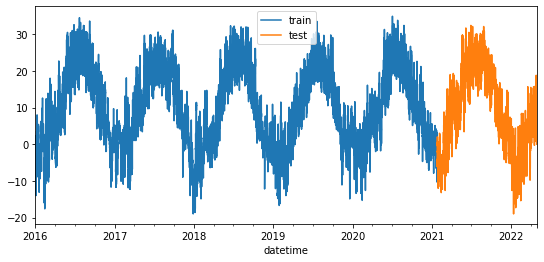

wind_spd_tia  dew_point_tia  temp_tia  wind_spd_tcc  \
datetime                                                                   
2016-01-01 00:00:00          20.0           -5.1      -0.3          37.0   
2016-01-01 01:00:00          25.0           -5.5      -0.3          37.0   
2016-01-01 02:00:00          26.0           -4.7      -0.4          37.0   
2016-01-01 03:00:00          30.0           -4.7      -0.4          41.0   

                     dew_point_tcc  temp_tcc  wind_spd_b  dew_point_b  temp_b  \
datetime                                                                        
2016-01-01 00:00:00           -3.7       1.1         9.0        -15.1    -9.5   
2016-01-01 01:00:00           -3.8       0.9         9.0        -15.1    -9.5   
2016-01-01 02:00:00           -3.0       0.8         9.0        -15.1    -9.5   
2016-01-01 03:00:00           -2.9       0.8         9.0        -15.1    -9.5   

                     dew_point_tc  ...  wind_dir_tcc_N  wind_dir_tcc_NE  \
datetime                           ...                                    
2016-01-01 00:00:00          -4.3  ...               0                0   
2016-01-01 01:00:00          -4.6  ...               0                0   
2016-01-01 02:00:00          -4.0  ...               0                0   
2016-01-01 03:00:00          -3.1  ...               0                0   

                     wind_dir_tcc_NNE  wind_dir_b_N  wind_dir_b_NE  \
datetime                                                             
2016-01-01 00:00:00                 1             0              0   
2016-01-01 01:00:00                 1             0              0   
2016-01-01 02:00:00                 1             0              0   
2016-01-01 03:00:00                 1             0              0   

                     wind_dir_b_NNE  month  week  day  day_of_week  
datetime                                                            
2016-01-01 00:00:00               1      1    53    1            4  
2016-01-01 01:00:00               1      1    53    1            4  
2016-01-01 02:00:00               1      1    53    1            4  
2016-01-01 03:00:00               1      1    53    1            4  

[4 rows x 32 columns]

In [10]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/peteryouu/MRP2022/main/processed_data/total_data_no_lag.csv')
data = pd.read_csv(url, sep=',', header=0)

# Data preprocessing
# ==============================================================================
data = data.rename(columns={'Date':'datetime'})
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('H',method='ffill')
data = data.sort_index()


# Finding end_train date

TRAIN_PERCENT = 0.8
end_train_idx = int(len(data) * 0.8)
end_train_date = data.iloc[end_train_idx].name

# Train-validation dates
# ==============================================================================
end_train = end_train_date

print(f"Train dates      : {data.index.min()} --- {data.loc[:end_train].index.max()}  (n={len(data.loc[:end_train])})")
print(f"Validation dates : {data.loc[end_train:].index.min()} --- {data.index.max()}  (n={len(data.loc[end_train:])})")

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data.actual_temp.loc[:end_train].plot(ax=ax, label='train')
data.actual_temp.loc[end_train:].plot(ax=ax, label='test')
ax.legend()
plt.show()

display(data.head(4))

In [7]:
end_train_date

Timestamp('2021-01-23 14:00:00', freq='H')

In [3]:
data.columns

Index(['wind_spd_tia', 'dew_point_tia', 'temp_tia', 'wind_spd_tcc',
       'dew_point_tcc', 'temp_tcc', 'wind_spd_b', 'dew_point_b', 'temp_b',
       'dew_point_tc', 'actual_temp', 'solar_rad', 'hmdx_tia',
       'wind_chill_tia', 'weather_label_tia_Clear', 'weather_label_tia_Cloudy',
       'weather_label_tia_Fog', 'weather_label_tia_Rain',
       'weather_label_tia_Snow', 'wind_dir_tia_N', 'wind_dir_tia_NE',
       'wind_dir_tia_NNE', 'wind_dir_tcc_N', 'wind_dir_tcc_NE',
       'wind_dir_tcc_NNE', 'wind_dir_b_N', 'wind_dir_b_NE', 'wind_dir_b_NNE',
       'month', 'week', 'day', 'day_of_week'],
      dtype='object')

In [5]:
LAGS = 5

print(f"Iteration Number {LAGS}")
# Backtest forecaster exogenous variables
# ==============================================================================
forecaster5 = ForecasterAutoreg(
                  regressor = LGBMRegressor(random_state=42),
                  lags      = LAGS 
             )

#backtesting_forecaster creates copy of model, and rtains model with length of series set in initial_train_size
#predicts and stores next steps (however many in kwargs)
#refit = true -> training set is increased to length of initial train size
#model is then retrained, next steps predicted

exogenous_features = ['wind_spd_tia', 'dew_point_tia', 'temp_tia', 'wind_spd_tcc',
       'dew_point_tcc', 'temp_tcc', 'wind_spd_b', 'dew_point_b', 'temp_b',
       'dew_point_tc', 'solar_rad', 'hmdx_tia',
       'wind_chill_tia', 'weather_label_tia_Clear', 'weather_label_tia_Cloudy',
       'weather_label_tia_Fog', 'weather_label_tia_Rain',
       'weather_label_tia_Snow', 'wind_dir_tia_N', 'wind_dir_tia_NE',
       'wind_dir_tia_NNE', 'wind_dir_tcc_N', 'wind_dir_tcc_NE',
       'wind_dir_tcc_NNE', 'wind_dir_b_N', 'wind_dir_b_NE', 'wind_dir_b_NNE',
       'month', 'week', 'day', 'day_of_week']

metric5, predictions_backtest5  = backtesting_forecaster(
                                    forecaster = forecaster5,
                                    y          = data['actual_temp'],
                                    exog       = data[exogenous_features],
                                    initial_train_size = len(data.loc[:end_train]),
                                    fixed_train_size   = False,
                                    steps      = LAGS,
                                    metric     = 'mean_squared_error',
                                    refit      = True,
                                    verbose    = True
                               )


Iteration Number 5
Information of backtesting process
----------------------------------
Number of observations used for initial training: 44391
Number of observations used for backtesting: 11097
    Number of folds: 2220
    Number of steps per fold: 5
    Last fold only includes 2 observations.

Data partition in fold: 0
    Training:   2016-01-01 00:00:00 -- 2021-01-23 14:00:00
    Validation: 2021-01-23 15:00:00 -- 2021-01-23 19:00:00
Data partition in fold: 1
    Training:   2016-01-01 00:00:00 -- 2021-01-23 19:00:00
    Validation: 2021-01-23 20:00:00 -- 2021-01-24 00:00:00
Data partition in fold: 2
    Training:   2016-01-01 00:00:00 -- 2021-01-24 00:00:00
    Validation: 2021-01-24 01:00:00 -- 2021-01-24 05:00:00
Data partition in fold: 3
    Training:   2016-01-01 00:00:00 -- 2021-01-24 05:00:00
    Validation: 2021-01-24 06:00:00 -- 2021-01-24 10:00:00
Data partition in fold: 4
    Training:   2016-01-01 00:00:00 -- 2021-01-24 10:00:00
    Validation: 2021-01-24 11:00:00 -- 2

Data partition in fold: 1084
    Training:   2016-01-01 00:00:00 -- 2021-09-06 10:00:00
    Validation: 2021-09-06 11:00:00 -- 2021-09-06 15:00:00
Data partition in fold: 1085
    Training:   2016-01-01 00:00:00 -- 2021-09-06 15:00:00
    Validation: 2021-09-06 16:00:00 -- 2021-09-06 20:00:00
Data partition in fold: 1086
    Training:   2016-01-01 00:00:00 -- 2021-09-06 20:00:00
    Validation: 2021-09-06 21:00:00 -- 2021-09-07 01:00:00
Data partition in fold: 1087
    Training:   2016-01-01 00:00:00 -- 2021-09-07 01:00:00
    Validation: 2021-09-07 02:00:00 -- 2021-09-07 06:00:00
Data partition in fold: 1088
    Training:   2016-01-01 00:00:00 -- 2021-09-07 06:00:00
    Validation: 2021-09-07 07:00:00 -- 2021-09-07 11:00:00
Data partition in fold: 1089
    Training:   2016-01-01 00:00:00 -- 2021-09-07 11:00:00
    Validation: 2021-09-07 12:00:00 -- 2021-09-07 16:00:00
Data partition in fold: 1090
    Training:   2016-01-01 00:00:00 -- 2021-09-07 16:00:00
    Validation: 2021-09-07 17:

    Training:   2016-01-01 00:00:00 -- 2022-04-30 01:00:00
    Validation: 2022-04-30 02:00:00 -- 2022-04-30 06:00:00
Data partition in fold: 2216
    Training:   2016-01-01 00:00:00 -- 2022-04-30 06:00:00
    Validation: 2022-04-30 07:00:00 -- 2022-04-30 11:00:00
Data partition in fold: 2217
    Training:   2016-01-01 00:00:00 -- 2022-04-30 11:00:00
    Validation: 2022-04-30 12:00:00 -- 2022-04-30 16:00:00
Data partition in fold: 2218
    Training:   2016-01-01 00:00:00 -- 2022-04-30 16:00:00
    Validation: 2022-04-30 17:00:00 -- 2022-04-30 21:00:00
Data partition in fold: 2219
    Training:   2016-01-01 00:00:00 -- 2022-04-30 21:00:00
    Validation: 2022-04-30 22:00:00 -- 2022-04-30 23:00:00

Forecaster will be fit 2220 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 

Using lag and step 5 we get...


NameError: name 'metric' is not defined

In [6]:
print(f"Using lag and step {LAGS} we get...")
print(f"Backtest error with exogenous variables: {metric5}")

Using lag and step 5 we get...
Backtest error with exogenous variables: 0.3298638401279755


In [7]:
LAGS = 4

print(f"Iteration Number {LAGS}")
# Backtest forecaster exogenous variables
# ==============================================================================
forecaster4 = ForecasterAutoreg(
                  regressor = LGBMRegressor(random_state=42),
                  lags      = LAGS 
             )

#backtesting_forecaster creates copy of model, and rtains model with length of series set in initial_train_size
#predicts and stores next steps (however many in kwargs)
#refit = true -> training set is increased to length of initial train size
#model is then retrained, next steps predicted

exogenous_features = ['wind_spd_tia', 'dew_point_tia', 'temp_tia', 'wind_spd_tcc',
       'dew_point_tcc', 'temp_tcc', 'wind_spd_b', 'dew_point_b', 'temp_b',
       'dew_point_tc', 'solar_rad', 'hmdx_tia',
       'wind_chill_tia', 'weather_label_tia_Clear', 'weather_label_tia_Cloudy',
       'weather_label_tia_Fog', 'weather_label_tia_Rain',
       'weather_label_tia_Snow', 'wind_dir_tia_N', 'wind_dir_tia_NE',
       'wind_dir_tia_NNE', 'wind_dir_tcc_N', 'wind_dir_tcc_NE',
       'wind_dir_tcc_NNE', 'wind_dir_b_N', 'wind_dir_b_NE', 'wind_dir_b_NNE',
       'month', 'week', 'day', 'day_of_week']

metric4, predictions_backtest4  = backtesting_forecaster(
                                    forecaster = forecaster5,
                                    y          = data['actual_temp'],
                                    exog       = data[exogenous_features],
                                    initial_train_size = len(data.loc[:end_train]),
                                    fixed_train_size   = False,
                                    steps      = LAGS,
                                    metric     = 'mean_squared_error',
                                    refit      = True,
                                    verbose    = True
                               )
print(f"Using lag and step {LAGS} we get...")
print(f"Backtest error with exogenous variables: {metric4}")

Iteration Number 4
Information of backtesting process
----------------------------------
Number of observations used for initial training: 44391
Number of observations used for backtesting: 11097
    Number of folds: 2775
    Number of steps per fold: 4
    Last fold only includes 1 observations.

Data partition in fold: 0
    Training:   2016-01-01 00:00:00 -- 2021-01-23 14:00:00
    Validation: 2021-01-23 15:00:00 -- 2021-01-23 18:00:00
Data partition in fold: 1
    Training:   2016-01-01 00:00:00 -- 2021-01-23 18:00:00
    Validation: 2021-01-23 19:00:00 -- 2021-01-23 22:00:00
Data partition in fold: 2
    Training:   2016-01-01 00:00:00 -- 2021-01-23 22:00:00
    Validation: 2021-01-23 23:00:00 -- 2021-01-24 02:00:00
Data partition in fold: 3
    Training:   2016-01-01 00:00:00 -- 2021-01-24 02:00:00
    Validation: 2021-01-24 03:00:00 -- 2021-01-24 06:00:00
Data partition in fold: 4
    Training:   2016-01-01 00:00:00 -- 2021-01-24 06:00:00
    Validation: 2021-01-24 07:00:00 -- 2

Data partition in fold: 1186
    Training:   2016-01-01 00:00:00 -- 2021-08-09 06:00:00
    Validation: 2021-08-09 07:00:00 -- 2021-08-09 10:00:00
Data partition in fold: 1187
    Training:   2016-01-01 00:00:00 -- 2021-08-09 10:00:00
    Validation: 2021-08-09 11:00:00 -- 2021-08-09 14:00:00
Data partition in fold: 1188
    Training:   2016-01-01 00:00:00 -- 2021-08-09 14:00:00
    Validation: 2021-08-09 15:00:00 -- 2021-08-09 18:00:00
Data partition in fold: 1189
    Training:   2016-01-01 00:00:00 -- 2021-08-09 18:00:00
    Validation: 2021-08-09 19:00:00 -- 2021-08-09 22:00:00
Data partition in fold: 1190
    Training:   2016-01-01 00:00:00 -- 2021-08-09 22:00:00
    Validation: 2021-08-09 23:00:00 -- 2021-08-10 02:00:00
Data partition in fold: 1191
    Training:   2016-01-01 00:00:00 -- 2021-08-10 02:00:00
    Validation: 2021-08-10 03:00:00 -- 2021-08-10 06:00:00
Data partition in fold: 1192
    Training:   2016-01-01 00:00:00 -- 2021-08-10 06:00:00
    Validation: 2021-08-10 07:

Data partition in fold: 2268
    Training:   2016-01-01 00:00:00 -- 2022-02-05 14:00:00
    Validation: 2022-02-05 15:00:00 -- 2022-02-05 18:00:00
Data partition in fold: 2269
    Training:   2016-01-01 00:00:00 -- 2022-02-05 18:00:00
    Validation: 2022-02-05 19:00:00 -- 2022-02-05 22:00:00
Data partition in fold: 2270
    Training:   2016-01-01 00:00:00 -- 2022-02-05 22:00:00
    Validation: 2022-02-05 23:00:00 -- 2022-02-06 02:00:00
Data partition in fold: 2271
    Training:   2016-01-01 00:00:00 -- 2022-02-06 02:00:00
    Validation: 2022-02-06 03:00:00 -- 2022-02-06 06:00:00
Data partition in fold: 2272
    Training:   2016-01-01 00:00:00 -- 2022-02-06 06:00:00
    Validation: 2022-02-06 07:00:00 -- 2022-02-06 10:00:00
Data partition in fold: 2273
    Training:   2016-01-01 00:00:00 -- 2022-02-06 10:00:00
    Validation: 2022-02-06 11:00:00 -- 2022-02-06 14:00:00
Data partition in fold: 2274
    Training:   2016-01-01 00:00:00 -- 2022-02-06 14:00:00
    Validation: 2022-02-06 15:

Using lag and step 4 we get...
Backtest error with exogenous variables: 0.3210395800312284


In [8]:
LAGS = 3

print(f"Iteration Number {LAGS}")
# Backtest forecaster exogenous variables
# ==============================================================================
forecaster3 = ForecasterAutoreg(
                  regressor = LGBMRegressor(random_state=42),
                  lags      = LAGS 
             )

#backtesting_forecaster creates copy of model, and rtains model with length of series set in initial_train_size
#predicts and stores next steps (however many in kwargs)
#refit = true -> training set is increased to length of initial train size
#model is then retrained, next steps predicted

exogenous_features = ['wind_spd_tia', 'dew_point_tia', 'temp_tia', 'wind_spd_tcc',
       'dew_point_tcc', 'temp_tcc', 'wind_spd_b', 'dew_point_b', 'temp_b',
       'dew_point_tc', 'solar_rad', 'hmdx_tia',
       'wind_chill_tia', 'weather_label_tia_Clear', 'weather_label_tia_Cloudy',
       'weather_label_tia_Fog', 'weather_label_tia_Rain',
       'weather_label_tia_Snow', 'wind_dir_tia_N', 'wind_dir_tia_NE',
       'wind_dir_tia_NNE', 'wind_dir_tcc_N', 'wind_dir_tcc_NE',
       'wind_dir_tcc_NNE', 'wind_dir_b_N', 'wind_dir_b_NE', 'wind_dir_b_NNE',
       'month', 'week', 'day', 'day_of_week']

metric3, predictions_backtest3  = backtesting_forecaster(
                                    forecaster = forecaster5,
                                    y          = data['actual_temp'],
                                    exog       = data[exogenous_features],
                                    initial_train_size = len(data.loc[:end_train]),
                                    fixed_train_size   = False,
                                    steps      = LAGS,
                                    metric     = 'mean_squared_error',
                                    refit      = True,
                                    verbose    = True
                               )
print(f"Using lag and step {LAGS} we get...")
print(f"Backtest error with exogenous variables: {metric3}")

Iteration Number 3
Information of backtesting process
----------------------------------
Number of observations used for initial training: 44391
Number of observations used for backtesting: 11097
    Number of folds: 3699
    Number of steps per fold: 3

Data partition in fold: 0
    Training:   2016-01-01 00:00:00 -- 2021-01-23 14:00:00
    Validation: 2021-01-23 15:00:00 -- 2021-01-23 17:00:00
Data partition in fold: 1
    Training:   2016-01-01 00:00:00 -- 2021-01-23 17:00:00
    Validation: 2021-01-23 18:00:00 -- 2021-01-23 20:00:00
Data partition in fold: 2
    Training:   2016-01-01 00:00:00 -- 2021-01-23 20:00:00
    Validation: 2021-01-23 21:00:00 -- 2021-01-23 23:00:00
Data partition in fold: 3
    Training:   2016-01-01 00:00:00 -- 2021-01-23 23:00:00
    Validation: 2021-01-24 00:00:00 -- 2021-01-24 02:00:00
Data partition in fold: 4
    Training:   2016-01-01 00:00:00 -- 2021-01-24 02:00:00
    Validation: 2021-01-24 03:00:00 -- 2021-01-24 05:00:00
Data partition in fold: 5

    Training:   2016-01-01 00:00:00 -- 2021-05-16 14:00:00
    Validation: 2021-05-16 15:00:00 -- 2021-05-16 17:00:00
Data partition in fold: 905
    Training:   2016-01-01 00:00:00 -- 2021-05-16 17:00:00
    Validation: 2021-05-16 18:00:00 -- 2021-05-16 20:00:00
Data partition in fold: 906
    Training:   2016-01-01 00:00:00 -- 2021-05-16 20:00:00
    Validation: 2021-05-16 21:00:00 -- 2021-05-16 23:00:00
Data partition in fold: 907
    Training:   2016-01-01 00:00:00 -- 2021-05-16 23:00:00
    Validation: 2021-05-17 00:00:00 -- 2021-05-17 02:00:00
Data partition in fold: 908
    Training:   2016-01-01 00:00:00 -- 2021-05-17 02:00:00
    Validation: 2021-05-17 03:00:00 -- 2021-05-17 05:00:00
Data partition in fold: 909
    Training:   2016-01-01 00:00:00 -- 2021-05-17 05:00:00
    Validation: 2021-05-17 06:00:00 -- 2021-05-17 08:00:00
Data partition in fold: 910
    Training:   2016-01-01 00:00:00 -- 2021-05-17 08:00:00
    Validation: 2021-05-17 09:00:00 -- 2021-05-17 11:00:00
Data p

Data partition in fold: 1071
    Training:   2016-01-01 00:00:00 -- 2021-06-06 11:00:00
    Validation: 2021-06-06 12:00:00 -- 2021-06-06 14:00:00
Data partition in fold: 1072
    Training:   2016-01-01 00:00:00 -- 2021-06-06 14:00:00
    Validation: 2021-06-06 15:00:00 -- 2021-06-06 17:00:00
Data partition in fold: 1073
    Training:   2016-01-01 00:00:00 -- 2021-06-06 17:00:00
    Validation: 2021-06-06 18:00:00 -- 2021-06-06 20:00:00
Data partition in fold: 1074
    Training:   2016-01-01 00:00:00 -- 2021-06-06 20:00:00
    Validation: 2021-06-06 21:00:00 -- 2021-06-06 23:00:00
Data partition in fold: 1075
    Training:   2016-01-01 00:00:00 -- 2021-06-06 23:00:00
    Validation: 2021-06-07 00:00:00 -- 2021-06-07 02:00:00
Data partition in fold: 1076
    Training:   2016-01-01 00:00:00 -- 2021-06-07 02:00:00
    Validation: 2021-06-07 03:00:00 -- 2021-06-07 05:00:00
Data partition in fold: 1077
    Training:   2016-01-01 00:00:00 -- 2021-06-07 05:00:00
    Validation: 2021-06-07 06:

    Training:   2016-01-01 00:00:00 -- 2021-09-19 20:00:00
    Validation: 2021-09-19 21:00:00 -- 2021-09-19 23:00:00
Data partition in fold: 1915
    Training:   2016-01-01 00:00:00 -- 2021-09-19 23:00:00
    Validation: 2021-09-20 00:00:00 -- 2021-09-20 02:00:00
Data partition in fold: 1916
    Training:   2016-01-01 00:00:00 -- 2021-09-20 02:00:00
    Validation: 2021-09-20 03:00:00 -- 2021-09-20 05:00:00
Data partition in fold: 1917
    Training:   2016-01-01 00:00:00 -- 2021-09-20 05:00:00
    Validation: 2021-09-20 06:00:00 -- 2021-09-20 08:00:00
Data partition in fold: 1918
    Training:   2016-01-01 00:00:00 -- 2021-09-20 08:00:00
    Validation: 2021-09-20 09:00:00 -- 2021-09-20 11:00:00
Data partition in fold: 1919
    Training:   2016-01-01 00:00:00 -- 2021-09-20 11:00:00
    Validation: 2021-09-20 12:00:00 -- 2021-09-20 14:00:00
Data partition in fold: 1920
    Training:   2016-01-01 00:00:00 -- 2021-09-20 14:00:00
    Validation: 2021-09-20 15:00:00 -- 2021-09-20 17:00:00


    Training:   2016-01-01 00:00:00 -- 2021-10-10 20:00:00
    Validation: 2021-10-10 21:00:00 -- 2021-10-10 23:00:00
Data partition in fold: 2083
    Training:   2016-01-01 00:00:00 -- 2021-10-10 23:00:00
    Validation: 2021-10-11 00:00:00 -- 2021-10-11 02:00:00
Data partition in fold: 2084
    Training:   2016-01-01 00:00:00 -- 2021-10-11 02:00:00
    Validation: 2021-10-11 03:00:00 -- 2021-10-11 05:00:00
Data partition in fold: 2085
    Training:   2016-01-01 00:00:00 -- 2021-10-11 05:00:00
    Validation: 2021-10-11 06:00:00 -- 2021-10-11 08:00:00
Data partition in fold: 2086
    Training:   2016-01-01 00:00:00 -- 2021-10-11 08:00:00
    Validation: 2021-10-11 09:00:00 -- 2021-10-11 11:00:00
Data partition in fold: 2087
    Training:   2016-01-01 00:00:00 -- 2021-10-11 11:00:00
    Validation: 2021-10-11 12:00:00 -- 2021-10-11 14:00:00
Data partition in fold: 2088
    Training:   2016-01-01 00:00:00 -- 2021-10-11 14:00:00
    Validation: 2021-10-11 15:00:00 -- 2021-10-11 17:00:00


    Training:   2016-01-01 00:00:00 -- 2022-01-26 23:00:00
    Validation: 2022-01-27 00:00:00 -- 2022-01-27 02:00:00
Data partition in fold: 2948
    Training:   2016-01-01 00:00:00 -- 2022-01-27 02:00:00
    Validation: 2022-01-27 03:00:00 -- 2022-01-27 05:00:00
Data partition in fold: 2949
    Training:   2016-01-01 00:00:00 -- 2022-01-27 05:00:00
    Validation: 2022-01-27 06:00:00 -- 2022-01-27 08:00:00
Data partition in fold: 2950
    Training:   2016-01-01 00:00:00 -- 2022-01-27 08:00:00
    Validation: 2022-01-27 09:00:00 -- 2022-01-27 11:00:00
Data partition in fold: 2951
    Training:   2016-01-01 00:00:00 -- 2022-01-27 11:00:00
    Validation: 2022-01-27 12:00:00 -- 2022-01-27 14:00:00
Data partition in fold: 2952
    Training:   2016-01-01 00:00:00 -- 2022-01-27 14:00:00
    Validation: 2022-01-27 15:00:00 -- 2022-01-27 17:00:00
Data partition in fold: 2953
    Training:   2016-01-01 00:00:00 -- 2022-01-27 17:00:00
    Validation: 2022-01-27 18:00:00 -- 2022-01-27 20:00:00


    Validation: 2022-02-26 00:00:00 -- 2022-02-26 02:00:00
Data partition in fold: 3188
    Training:   2016-01-01 00:00:00 -- 2022-02-26 02:00:00
    Validation: 2022-02-26 03:00:00 -- 2022-02-26 05:00:00
Data partition in fold: 3189
    Training:   2016-01-01 00:00:00 -- 2022-02-26 05:00:00
    Validation: 2022-02-26 06:00:00 -- 2022-02-26 08:00:00
Data partition in fold: 3190
    Training:   2016-01-01 00:00:00 -- 2022-02-26 08:00:00
    Validation: 2022-02-26 09:00:00 -- 2022-02-26 11:00:00
Data partition in fold: 3191
    Training:   2016-01-01 00:00:00 -- 2022-02-26 11:00:00
    Validation: 2022-02-26 12:00:00 -- 2022-02-26 14:00:00
Data partition in fold: 3192
    Training:   2016-01-01 00:00:00 -- 2022-02-26 14:00:00
    Validation: 2022-02-26 15:00:00 -- 2022-02-26 17:00:00
Data partition in fold: 3193
    Training:   2016-01-01 00:00:00 -- 2022-02-26 17:00:00
    Validation: 2022-02-26 18:00:00 -- 2022-02-26 20:00:00
Data partition in fold: 3194
    Training:   2016-01-01 00:

Using lag and step 3 we get...
Backtest error with exogenous variables: 0.3034180237031799


In [9]:
LAGS = 2

print(f"Iteration Number {LAGS}")
# Backtest forecaster exogenous variables
# ==============================================================================
forecaster2 = ForecasterAutoreg(
                  regressor = LGBMRegressor(random_state=42),
                  lags      = LAGS 
             )

#backtesting_forecaster creates copy of model, and rtains model with length of series set in initial_train_size
#predicts and stores next steps (however many in kwargs)
#refit = true -> training set is increased to length of initial train size
#model is then retrained, next steps predicted

exogenous_features = ['wind_spd_tia', 'dew_point_tia', 'temp_tia', 'wind_spd_tcc',
       'dew_point_tcc', 'temp_tcc', 'wind_spd_b', 'dew_point_b', 'temp_b',
       'dew_point_tc', 'solar_rad', 'hmdx_tia',
       'wind_chill_tia', 'weather_label_tia_Clear', 'weather_label_tia_Cloudy',
       'weather_label_tia_Fog', 'weather_label_tia_Rain',
       'weather_label_tia_Snow', 'wind_dir_tia_N', 'wind_dir_tia_NE',
       'wind_dir_tia_NNE', 'wind_dir_tcc_N', 'wind_dir_tcc_NE',
       'wind_dir_tcc_NNE', 'wind_dir_b_N', 'wind_dir_b_NE', 'wind_dir_b_NNE',
       'month', 'week', 'day', 'day_of_week']

metric2, predictions_backtest2  = backtesting_forecaster(
                                    forecaster = forecaster5,
                                    y          = data['actual_temp'],
                                    exog       = data[exogenous_features],
                                    initial_train_size = len(data.loc[:end_train]),
                                    fixed_train_size   = False,
                                    steps      = LAGS,
                                    metric     = 'mean_squared_error',
                                    refit      = True,
                                    verbose    = True
                               )
print(f"Using lag and step {LAGS} we get...")
print(f"Backtest error with exogenous variables: {metric2}")

Iteration Number 2
Information of backtesting process
----------------------------------
Number of observations used for initial training: 44391
Number of observations used for backtesting: 11097
    Number of folds: 5549
    Number of steps per fold: 2
    Last fold only includes 1 observations.

Data partition in fold: 0
    Training:   2016-01-01 00:00:00 -- 2021-01-23 14:00:00
    Validation: 2021-01-23 15:00:00 -- 2021-01-23 16:00:00
Data partition in fold: 1
    Training:   2016-01-01 00:00:00 -- 2021-01-23 16:00:00
    Validation: 2021-01-23 17:00:00 -- 2021-01-23 18:00:00
Data partition in fold: 2
    Training:   2016-01-01 00:00:00 -- 2021-01-23 18:00:00
    Validation: 2021-01-23 19:00:00 -- 2021-01-23 20:00:00
Data partition in fold: 3
    Training:   2016-01-01 00:00:00 -- 2021-01-23 20:00:00
    Validation: 2021-01-23 21:00:00 -- 2021-01-23 22:00:00
Data partition in fold: 4
    Training:   2016-01-01 00:00:00 -- 2021-01-23 22:00:00
    Validation: 2021-01-23 23:00:00 -- 2

    Validation: 2021-04-11 05:00:00 -- 2021-04-11 06:00:00
Data partition in fold: 932
    Training:   2016-01-01 00:00:00 -- 2021-04-11 06:00:00
    Validation: 2021-04-11 07:00:00 -- 2021-04-11 08:00:00
Data partition in fold: 933
    Training:   2016-01-01 00:00:00 -- 2021-04-11 08:00:00
    Validation: 2021-04-11 09:00:00 -- 2021-04-11 10:00:00
Data partition in fold: 934
    Training:   2016-01-01 00:00:00 -- 2021-04-11 10:00:00
    Validation: 2021-04-11 11:00:00 -- 2021-04-11 12:00:00
Data partition in fold: 935
    Training:   2016-01-01 00:00:00 -- 2021-04-11 12:00:00
    Validation: 2021-04-11 13:00:00 -- 2021-04-11 14:00:00
Data partition in fold: 936
    Training:   2016-01-01 00:00:00 -- 2021-04-11 14:00:00
    Validation: 2021-04-11 15:00:00 -- 2021-04-11 16:00:00
Data partition in fold: 937
    Training:   2016-01-01 00:00:00 -- 2021-04-11 16:00:00
    Validation: 2021-04-11 17:00:00 -- 2021-04-11 18:00:00
Data partition in fold: 938
    Training:   2016-01-01 00:00:00 -

    Training:   2016-01-01 00:00:00 -- 2021-04-22 00:00:00
    Validation: 2021-04-22 01:00:00 -- 2021-04-22 02:00:00
Data partition in fold: 1062
    Training:   2016-01-01 00:00:00 -- 2021-04-22 02:00:00
    Validation: 2021-04-22 03:00:00 -- 2021-04-22 04:00:00
Data partition in fold: 1063
    Training:   2016-01-01 00:00:00 -- 2021-04-22 04:00:00
    Validation: 2021-04-22 05:00:00 -- 2021-04-22 06:00:00
Data partition in fold: 1064
    Training:   2016-01-01 00:00:00 -- 2021-04-22 06:00:00
    Validation: 2021-04-22 07:00:00 -- 2021-04-22 08:00:00
Data partition in fold: 1065
    Training:   2016-01-01 00:00:00 -- 2021-04-22 08:00:00
    Validation: 2021-04-22 09:00:00 -- 2021-04-22 10:00:00
Data partition in fold: 1066
    Training:   2016-01-01 00:00:00 -- 2021-04-22 10:00:00
    Validation: 2021-04-22 11:00:00 -- 2021-04-22 12:00:00
Data partition in fold: 1067
    Training:   2016-01-01 00:00:00 -- 2021-04-22 12:00:00
    Validation: 2021-04-22 13:00:00 -- 2021-04-22 14:00:00


Data partition in fold: 1990
    Training:   2016-01-01 00:00:00 -- 2021-07-08 10:00:00
    Validation: 2021-07-08 11:00:00 -- 2021-07-08 12:00:00
Data partition in fold: 1991
    Training:   2016-01-01 00:00:00 -- 2021-07-08 12:00:00
    Validation: 2021-07-08 13:00:00 -- 2021-07-08 14:00:00
Data partition in fold: 1992
    Training:   2016-01-01 00:00:00 -- 2021-07-08 14:00:00
    Validation: 2021-07-08 15:00:00 -- 2021-07-08 16:00:00
Data partition in fold: 1993
    Training:   2016-01-01 00:00:00 -- 2021-07-08 16:00:00
    Validation: 2021-07-08 17:00:00 -- 2021-07-08 18:00:00
Data partition in fold: 1994
    Training:   2016-01-01 00:00:00 -- 2021-07-08 18:00:00
    Validation: 2021-07-08 19:00:00 -- 2021-07-08 20:00:00
Data partition in fold: 1995
    Training:   2016-01-01 00:00:00 -- 2021-07-08 20:00:00
    Validation: 2021-07-08 21:00:00 -- 2021-07-08 22:00:00
Data partition in fold: 1996
    Training:   2016-01-01 00:00:00 -- 2021-07-08 22:00:00
    Validation: 2021-07-08 23:

    Training:   2016-01-01 00:00:00 -- 2021-07-21 22:00:00
    Validation: 2021-07-21 23:00:00 -- 2021-07-22 00:00:00
Data partition in fold: 2153
    Training:   2016-01-01 00:00:00 -- 2021-07-22 00:00:00
    Validation: 2021-07-22 01:00:00 -- 2021-07-22 02:00:00
Data partition in fold: 2154
    Training:   2016-01-01 00:00:00 -- 2021-07-22 02:00:00
    Validation: 2021-07-22 03:00:00 -- 2021-07-22 04:00:00
Data partition in fold: 2155
    Training:   2016-01-01 00:00:00 -- 2021-07-22 04:00:00
    Validation: 2021-07-22 05:00:00 -- 2021-07-22 06:00:00
Data partition in fold: 2156
    Training:   2016-01-01 00:00:00 -- 2021-07-22 06:00:00
    Validation: 2021-07-22 07:00:00 -- 2021-07-22 08:00:00
Data partition in fold: 2157
    Training:   2016-01-01 00:00:00 -- 2021-07-22 08:00:00
    Validation: 2021-07-22 09:00:00 -- 2021-07-22 10:00:00
Data partition in fold: 2158
    Training:   2016-01-01 00:00:00 -- 2021-07-22 10:00:00
    Validation: 2021-07-22 11:00:00 -- 2021-07-22 12:00:00


Data partition in fold: 3005
    Training:   2016-01-01 00:00:00 -- 2021-10-01 00:00:00
    Validation: 2021-10-01 01:00:00 -- 2021-10-01 02:00:00
Data partition in fold: 3006
    Training:   2016-01-01 00:00:00 -- 2021-10-01 02:00:00
    Validation: 2021-10-01 03:00:00 -- 2021-10-01 04:00:00
Data partition in fold: 3007
    Training:   2016-01-01 00:00:00 -- 2021-10-01 04:00:00
    Validation: 2021-10-01 05:00:00 -- 2021-10-01 06:00:00
Data partition in fold: 3008
    Training:   2016-01-01 00:00:00 -- 2021-10-01 06:00:00
    Validation: 2021-10-01 07:00:00 -- 2021-10-01 08:00:00
Data partition in fold: 3009
    Training:   2016-01-01 00:00:00 -- 2021-10-01 08:00:00
    Validation: 2021-10-01 09:00:00 -- 2021-10-01 10:00:00
Data partition in fold: 3010
    Training:   2016-01-01 00:00:00 -- 2021-10-01 10:00:00
    Validation: 2021-10-01 11:00:00 -- 2021-10-01 12:00:00
Data partition in fold: 3011
    Training:   2016-01-01 00:00:00 -- 2021-10-01 12:00:00
    Validation: 2021-10-01 13:

    Training:   2016-01-01 00:00:00 -- 2021-10-15 20:00:00
    Validation: 2021-10-15 21:00:00 -- 2021-10-15 22:00:00
Data partition in fold: 3184
    Training:   2016-01-01 00:00:00 -- 2021-10-15 22:00:00
    Validation: 2021-10-15 23:00:00 -- 2021-10-16 00:00:00
Data partition in fold: 3185
    Training:   2016-01-01 00:00:00 -- 2021-10-16 00:00:00
    Validation: 2021-10-16 01:00:00 -- 2021-10-16 02:00:00
Data partition in fold: 3186
    Training:   2016-01-01 00:00:00 -- 2021-10-16 02:00:00
    Validation: 2021-10-16 03:00:00 -- 2021-10-16 04:00:00
Data partition in fold: 3187
    Training:   2016-01-01 00:00:00 -- 2021-10-16 04:00:00
    Validation: 2021-10-16 05:00:00 -- 2021-10-16 06:00:00
Data partition in fold: 3188
    Training:   2016-01-01 00:00:00 -- 2021-10-16 06:00:00
    Validation: 2021-10-16 07:00:00 -- 2021-10-16 08:00:00
Data partition in fold: 3189
    Training:   2016-01-01 00:00:00 -- 2021-10-16 08:00:00
    Validation: 2021-10-16 09:00:00 -- 2021-10-16 10:00:00


    Validation: 2021-12-23 15:00:00 -- 2021-12-23 16:00:00
Data partition in fold: 4009
    Training:   2016-01-01 00:00:00 -- 2021-12-23 16:00:00
    Validation: 2021-12-23 17:00:00 -- 2021-12-23 18:00:00
Data partition in fold: 4010
    Training:   2016-01-01 00:00:00 -- 2021-12-23 18:00:00
    Validation: 2021-12-23 19:00:00 -- 2021-12-23 20:00:00
Data partition in fold: 4011
    Training:   2016-01-01 00:00:00 -- 2021-12-23 20:00:00
    Validation: 2021-12-23 21:00:00 -- 2021-12-23 22:00:00
Data partition in fold: 4012
    Training:   2016-01-01 00:00:00 -- 2021-12-23 22:00:00
    Validation: 2021-12-23 23:00:00 -- 2021-12-24 00:00:00
Data partition in fold: 4013
    Training:   2016-01-01 00:00:00 -- 2021-12-24 00:00:00
    Validation: 2021-12-24 01:00:00 -- 2021-12-24 02:00:00
Data partition in fold: 4014
    Training:   2016-01-01 00:00:00 -- 2021-12-24 02:00:00
    Validation: 2021-12-24 03:00:00 -- 2021-12-24 04:00:00
Data partition in fold: 4015
    Training:   2016-01-01 00:

    Validation: 2022-01-05 01:00:00 -- 2022-01-05 02:00:00
Data partition in fold: 4158
    Training:   2016-01-01 00:00:00 -- 2022-01-05 02:00:00
    Validation: 2022-01-05 03:00:00 -- 2022-01-05 04:00:00
Data partition in fold: 4159
    Training:   2016-01-01 00:00:00 -- 2022-01-05 04:00:00
    Validation: 2022-01-05 05:00:00 -- 2022-01-05 06:00:00
Data partition in fold: 4160
    Training:   2016-01-01 00:00:00 -- 2022-01-05 06:00:00
    Validation: 2022-01-05 07:00:00 -- 2022-01-05 08:00:00
Data partition in fold: 4161
    Training:   2016-01-01 00:00:00 -- 2022-01-05 08:00:00
    Validation: 2022-01-05 09:00:00 -- 2022-01-05 10:00:00
Data partition in fold: 4162
    Training:   2016-01-01 00:00:00 -- 2022-01-05 10:00:00
    Validation: 2022-01-05 11:00:00 -- 2022-01-05 12:00:00
Data partition in fold: 4163
    Training:   2016-01-01 00:00:00 -- 2022-01-05 12:00:00
    Validation: 2022-01-05 13:00:00 -- 2022-01-05 14:00:00
Data partition in fold: 4164
    Training:   2016-01-01 00:

Data partition in fold: 5030
    Training:   2016-01-01 00:00:00 -- 2022-03-18 18:00:00
    Validation: 2022-03-18 19:00:00 -- 2022-03-18 20:00:00
Data partition in fold: 5031
    Training:   2016-01-01 00:00:00 -- 2022-03-18 20:00:00
    Validation: 2022-03-18 21:00:00 -- 2022-03-18 22:00:00
Data partition in fold: 5032
    Training:   2016-01-01 00:00:00 -- 2022-03-18 22:00:00
    Validation: 2022-03-18 23:00:00 -- 2022-03-19 00:00:00
Data partition in fold: 5033
    Training:   2016-01-01 00:00:00 -- 2022-03-19 00:00:00
    Validation: 2022-03-19 01:00:00 -- 2022-03-19 02:00:00
Data partition in fold: 5034
    Training:   2016-01-01 00:00:00 -- 2022-03-19 02:00:00
    Validation: 2022-03-19 03:00:00 -- 2022-03-19 04:00:00
Data partition in fold: 5035
    Training:   2016-01-01 00:00:00 -- 2022-03-19 04:00:00
    Validation: 2022-03-19 05:00:00 -- 2022-03-19 06:00:00
Data partition in fold: 5036
    Training:   2016-01-01 00:00:00 -- 2022-03-19 06:00:00
    Validation: 2022-03-19 07:

    Training:   2016-01-01 00:00:00 -- 2022-04-01 14:00:00
    Validation: 2022-04-01 15:00:00 -- 2022-04-01 16:00:00
Data partition in fold: 5197
    Training:   2016-01-01 00:00:00 -- 2022-04-01 16:00:00
    Validation: 2022-04-01 17:00:00 -- 2022-04-01 18:00:00
Data partition in fold: 5198
    Training:   2016-01-01 00:00:00 -- 2022-04-01 18:00:00
    Validation: 2022-04-01 19:00:00 -- 2022-04-01 20:00:00
Data partition in fold: 5199
    Training:   2016-01-01 00:00:00 -- 2022-04-01 20:00:00
    Validation: 2022-04-01 21:00:00 -- 2022-04-01 22:00:00
Data partition in fold: 5200
    Training:   2016-01-01 00:00:00 -- 2022-04-01 22:00:00
    Validation: 2022-04-01 23:00:00 -- 2022-04-02 00:00:00
Data partition in fold: 5201
    Training:   2016-01-01 00:00:00 -- 2022-04-02 00:00:00
    Validation: 2022-04-02 01:00:00 -- 2022-04-02 02:00:00
Data partition in fold: 5202
    Training:   2016-01-01 00:00:00 -- 2022-04-02 02:00:00
    Validation: 2022-04-02 03:00:00 -- 2022-04-02 04:00:00


Using lag and step 2 we get...
Backtest error with exogenous variables: 0.2794301837740388


In [10]:
LAGS = 1

print(f"Iteration Number {LAGS}")
# Backtest forecaster exogenous variables
# ==============================================================================
forecaster1 = ForecasterAutoreg(
                  regressor = LGBMRegressor(random_state=42),
                  lags      = LAGS 
             )

#backtesting_forecaster creates copy of model, and rtains model with length of series set in initial_train_size
#predicts and stores next steps (however many in kwargs)
#refit = true -> training set is increased to length of initial train size
#model is then retrained, next steps predicted

exogenous_features = ['wind_spd_tia', 'dew_point_tia', 'temp_tia', 'wind_spd_tcc',
       'dew_point_tcc', 'temp_tcc', 'wind_spd_b', 'dew_point_b', 'temp_b',
       'dew_point_tc', 'solar_rad', 'hmdx_tia',
       'wind_chill_tia', 'weather_label_tia_Clear', 'weather_label_tia_Cloudy',
       'weather_label_tia_Fog', 'weather_label_tia_Rain',
       'weather_label_tia_Snow', 'wind_dir_tia_N', 'wind_dir_tia_NE',
       'wind_dir_tia_NNE', 'wind_dir_tcc_N', 'wind_dir_tcc_NE',
       'wind_dir_tcc_NNE', 'wind_dir_b_N', 'wind_dir_b_NE', 'wind_dir_b_NNE',
       'month', 'week', 'day', 'day_of_week']

metric1, predictions_backtest1  = backtesting_forecaster(
                                    forecaster = forecaster5,
                                    y          = data['actual_temp'],
                                    exog       = data[exogenous_features],
                                    initial_train_size = len(data.loc[:end_train]),
                                    fixed_train_size   = False,
                                    steps      = LAGS,
                                    metric     = 'mean_squared_error',
                                    refit      = True,
                                    verbose    = True
                               )
print(f"Using lag and step {LAGS} we get...")
print(f"Backtest error with exogenous variables: {metric1}")

Iteration Number 1
Information of backtesting process
----------------------------------
Number of observations used for initial training: 44391
Number of observations used for backtesting: 11097
    Number of folds: 11097
    Number of steps per fold: 1

Data partition in fold: 0
    Training:   2016-01-01 00:00:00 -- 2021-01-23 14:00:00
    Validation: 2021-01-23 15:00:00 -- 2021-01-23 15:00:00
Data partition in fold: 1
    Training:   2016-01-01 00:00:00 -- 2021-01-23 15:00:00
    Validation: 2021-01-23 16:00:00 -- 2021-01-23 16:00:00
Data partition in fold: 2
    Training:   2016-01-01 00:00:00 -- 2021-01-23 16:00:00
    Validation: 2021-01-23 17:00:00 -- 2021-01-23 17:00:00
Data partition in fold: 3
    Training:   2016-01-01 00:00:00 -- 2021-01-23 17:00:00
    Validation: 2021-01-23 18:00:00 -- 2021-01-23 18:00:00
Data partition in fold: 4
    Training:   2016-01-01 00:00:00 -- 2021-01-23 18:00:00
    Validation: 2021-01-23 19:00:00 -- 2021-01-23 19:00:00
Data partition in fold: 

    Training:   2016-01-01 00:00:00 -- 2021-03-05 04:00:00
    Validation: 2021-03-05 05:00:00 -- 2021-03-05 05:00:00
Data partition in fold: 975
    Training:   2016-01-01 00:00:00 -- 2021-03-05 05:00:00
    Validation: 2021-03-05 06:00:00 -- 2021-03-05 06:00:00
Data partition in fold: 976
    Training:   2016-01-01 00:00:00 -- 2021-03-05 06:00:00
    Validation: 2021-03-05 07:00:00 -- 2021-03-05 07:00:00
Data partition in fold: 977
    Training:   2016-01-01 00:00:00 -- 2021-03-05 07:00:00
    Validation: 2021-03-05 08:00:00 -- 2021-03-05 08:00:00
Data partition in fold: 978
    Training:   2016-01-01 00:00:00 -- 2021-03-05 08:00:00
    Validation: 2021-03-05 09:00:00 -- 2021-03-05 09:00:00
Data partition in fold: 979
    Training:   2016-01-01 00:00:00 -- 2021-03-05 09:00:00
    Validation: 2021-03-05 10:00:00 -- 2021-03-05 10:00:00
Data partition in fold: 980
    Training:   2016-01-01 00:00:00 -- 2021-03-05 10:00:00
    Validation: 2021-03-05 11:00:00 -- 2021-03-05 11:00:00
Data p

    Validation: 2021-04-17 12:00:00 -- 2021-04-17 12:00:00
Data partition in fold: 2014
    Training:   2016-01-01 00:00:00 -- 2021-04-17 12:00:00
    Validation: 2021-04-17 13:00:00 -- 2021-04-17 13:00:00
Data partition in fold: 2015
    Training:   2016-01-01 00:00:00 -- 2021-04-17 13:00:00
    Validation: 2021-04-17 14:00:00 -- 2021-04-17 14:00:00
Data partition in fold: 2016
    Training:   2016-01-01 00:00:00 -- 2021-04-17 14:00:00
    Validation: 2021-04-17 15:00:00 -- 2021-04-17 15:00:00
Data partition in fold: 2017
    Training:   2016-01-01 00:00:00 -- 2021-04-17 15:00:00
    Validation: 2021-04-17 16:00:00 -- 2021-04-17 16:00:00
Data partition in fold: 2018
    Training:   2016-01-01 00:00:00 -- 2021-04-17 16:00:00
    Validation: 2021-04-17 17:00:00 -- 2021-04-17 17:00:00
Data partition in fold: 2019
    Training:   2016-01-01 00:00:00 -- 2021-04-17 17:00:00
    Validation: 2021-04-17 18:00:00 -- 2021-04-17 18:00:00
Data partition in fold: 2020
    Training:   2016-01-01 00:

    Validation: 2021-04-22 19:00:00 -- 2021-04-22 19:00:00
Data partition in fold: 2141
    Training:   2016-01-01 00:00:00 -- 2021-04-22 19:00:00
    Validation: 2021-04-22 20:00:00 -- 2021-04-22 20:00:00
Data partition in fold: 2142
    Training:   2016-01-01 00:00:00 -- 2021-04-22 20:00:00
    Validation: 2021-04-22 21:00:00 -- 2021-04-22 21:00:00
Data partition in fold: 2143
    Training:   2016-01-01 00:00:00 -- 2021-04-22 21:00:00
    Validation: 2021-04-22 22:00:00 -- 2021-04-22 22:00:00
Data partition in fold: 2144
    Training:   2016-01-01 00:00:00 -- 2021-04-22 22:00:00
    Validation: 2021-04-22 23:00:00 -- 2021-04-22 23:00:00
Data partition in fold: 2145
    Training:   2016-01-01 00:00:00 -- 2021-04-22 23:00:00
    Validation: 2021-04-23 00:00:00 -- 2021-04-23 00:00:00
Data partition in fold: 2146
    Training:   2016-01-01 00:00:00 -- 2021-04-23 00:00:00
    Validation: 2021-04-23 01:00:00 -- 2021-04-23 01:00:00
Data partition in fold: 2147
    Training:   2016-01-01 00:

    Training:   2016-01-01 00:00:00 -- 2021-06-03 10:00:00
    Validation: 2021-06-03 11:00:00 -- 2021-06-03 11:00:00
Data partition in fold: 3141
    Training:   2016-01-01 00:00:00 -- 2021-06-03 11:00:00
    Validation: 2021-06-03 12:00:00 -- 2021-06-03 12:00:00
Data partition in fold: 3142
    Training:   2016-01-01 00:00:00 -- 2021-06-03 12:00:00
    Validation: 2021-06-03 13:00:00 -- 2021-06-03 13:00:00
Data partition in fold: 3143
    Training:   2016-01-01 00:00:00 -- 2021-06-03 13:00:00
    Validation: 2021-06-03 14:00:00 -- 2021-06-03 14:00:00
Data partition in fold: 3144
    Training:   2016-01-01 00:00:00 -- 2021-06-03 14:00:00
    Validation: 2021-06-03 15:00:00 -- 2021-06-03 15:00:00
Data partition in fold: 3145
    Training:   2016-01-01 00:00:00 -- 2021-06-03 15:00:00
    Validation: 2021-06-03 16:00:00 -- 2021-06-03 16:00:00
Data partition in fold: 3146
    Training:   2016-01-01 00:00:00 -- 2021-06-03 16:00:00
    Validation: 2021-06-03 17:00:00 -- 2021-06-03 17:00:00


    Training:   2016-01-01 00:00:00 -- 2021-06-09 08:00:00
    Validation: 2021-06-09 09:00:00 -- 2021-06-09 09:00:00
Data partition in fold: 3283
    Training:   2016-01-01 00:00:00 -- 2021-06-09 09:00:00
    Validation: 2021-06-09 10:00:00 -- 2021-06-09 10:00:00
Data partition in fold: 3284
    Training:   2016-01-01 00:00:00 -- 2021-06-09 10:00:00
    Validation: 2021-06-09 11:00:00 -- 2021-06-09 11:00:00
Data partition in fold: 3285
    Training:   2016-01-01 00:00:00 -- 2021-06-09 11:00:00
    Validation: 2021-06-09 12:00:00 -- 2021-06-09 12:00:00
Data partition in fold: 3286
    Training:   2016-01-01 00:00:00 -- 2021-06-09 12:00:00
    Validation: 2021-06-09 13:00:00 -- 2021-06-09 13:00:00
Data partition in fold: 3287
    Training:   2016-01-01 00:00:00 -- 2021-06-09 13:00:00
    Validation: 2021-06-09 14:00:00 -- 2021-06-09 14:00:00
Data partition in fold: 3288
    Training:   2016-01-01 00:00:00 -- 2021-06-09 14:00:00
    Validation: 2021-06-09 15:00:00 -- 2021-06-09 15:00:00


    Validation: 2021-07-22 01:00:00 -- 2021-07-22 01:00:00
Data partition in fold: 4307
    Training:   2016-01-01 00:00:00 -- 2021-07-22 01:00:00
    Validation: 2021-07-22 02:00:00 -- 2021-07-22 02:00:00
Data partition in fold: 4308
    Training:   2016-01-01 00:00:00 -- 2021-07-22 02:00:00
    Validation: 2021-07-22 03:00:00 -- 2021-07-22 03:00:00
Data partition in fold: 4309
    Training:   2016-01-01 00:00:00 -- 2021-07-22 03:00:00
    Validation: 2021-07-22 04:00:00 -- 2021-07-22 04:00:00
Data partition in fold: 4310
    Training:   2016-01-01 00:00:00 -- 2021-07-22 04:00:00
    Validation: 2021-07-22 05:00:00 -- 2021-07-22 05:00:00
Data partition in fold: 4311
    Training:   2016-01-01 00:00:00 -- 2021-07-22 05:00:00
    Validation: 2021-07-22 06:00:00 -- 2021-07-22 06:00:00
Data partition in fold: 4312
    Training:   2016-01-01 00:00:00 -- 2021-07-22 06:00:00
    Validation: 2021-07-22 07:00:00 -- 2021-07-22 07:00:00
Data partition in fold: 4313
    Training:   2016-01-01 00:

    Validation: 2021-09-07 07:00:00 -- 2021-09-07 07:00:00
Data partition in fold: 5441
    Training:   2016-01-01 00:00:00 -- 2021-09-07 07:00:00
    Validation: 2021-09-07 08:00:00 -- 2021-09-07 08:00:00
Data partition in fold: 5442
    Training:   2016-01-01 00:00:00 -- 2021-09-07 08:00:00
    Validation: 2021-09-07 09:00:00 -- 2021-09-07 09:00:00
Data partition in fold: 5443
    Training:   2016-01-01 00:00:00 -- 2021-09-07 09:00:00
    Validation: 2021-09-07 10:00:00 -- 2021-09-07 10:00:00
Data partition in fold: 5444
    Training:   2016-01-01 00:00:00 -- 2021-09-07 10:00:00
    Validation: 2021-09-07 11:00:00 -- 2021-09-07 11:00:00
Data partition in fold: 5445
    Training:   2016-01-01 00:00:00 -- 2021-09-07 11:00:00
    Validation: 2021-09-07 12:00:00 -- 2021-09-07 12:00:00
Data partition in fold: 5446
    Training:   2016-01-01 00:00:00 -- 2021-09-07 12:00:00
    Validation: 2021-09-07 13:00:00 -- 2021-09-07 13:00:00
Data partition in fold: 5447
    Training:   2016-01-01 00:

    Validation: 2021-10-23 15:00:00 -- 2021-10-23 15:00:00
Data partition in fold: 6553
    Training:   2016-01-01 00:00:00 -- 2021-10-23 15:00:00
    Validation: 2021-10-23 16:00:00 -- 2021-10-23 16:00:00
Data partition in fold: 6554
    Training:   2016-01-01 00:00:00 -- 2021-10-23 16:00:00
    Validation: 2021-10-23 17:00:00 -- 2021-10-23 17:00:00
Data partition in fold: 6555
    Training:   2016-01-01 00:00:00 -- 2021-10-23 17:00:00
    Validation: 2021-10-23 18:00:00 -- 2021-10-23 18:00:00
Data partition in fold: 6556
    Training:   2016-01-01 00:00:00 -- 2021-10-23 18:00:00
    Validation: 2021-10-23 19:00:00 -- 2021-10-23 19:00:00
Data partition in fold: 6557
    Training:   2016-01-01 00:00:00 -- 2021-10-23 19:00:00
    Validation: 2021-10-23 20:00:00 -- 2021-10-23 20:00:00
Data partition in fold: 6558
    Training:   2016-01-01 00:00:00 -- 2021-10-23 20:00:00
    Validation: 2021-10-23 21:00:00 -- 2021-10-23 21:00:00
Data partition in fold: 6559
    Training:   2016-01-01 00:

    Training:   2016-01-01 00:00:00 -- 2021-10-27 05:00:00
    Validation: 2021-10-27 06:00:00 -- 2021-10-27 06:00:00
Data partition in fold: 6640
    Training:   2016-01-01 00:00:00 -- 2021-10-27 06:00:00
    Validation: 2021-10-27 07:00:00 -- 2021-10-27 07:00:00
Data partition in fold: 6641
    Training:   2016-01-01 00:00:00 -- 2021-10-27 07:00:00
    Validation: 2021-10-27 08:00:00 -- 2021-10-27 08:00:00
Data partition in fold: 6642
    Training:   2016-01-01 00:00:00 -- 2021-10-27 08:00:00
    Validation: 2021-10-27 09:00:00 -- 2021-10-27 09:00:00
Data partition in fold: 6643
    Training:   2016-01-01 00:00:00 -- 2021-10-27 09:00:00
    Validation: 2021-10-27 10:00:00 -- 2021-10-27 10:00:00
Data partition in fold: 6644
    Training:   2016-01-01 00:00:00 -- 2021-10-27 10:00:00
    Validation: 2021-10-27 11:00:00 -- 2021-10-27 11:00:00
Data partition in fold: 6645
    Training:   2016-01-01 00:00:00 -- 2021-10-27 11:00:00
    Validation: 2021-10-27 12:00:00 -- 2021-10-27 12:00:00


    Validation: 2021-12-09 10:00:00 -- 2021-12-09 10:00:00
Data partition in fold: 7676
    Training:   2016-01-01 00:00:00 -- 2021-12-09 10:00:00
    Validation: 2021-12-09 11:00:00 -- 2021-12-09 11:00:00
Data partition in fold: 7677
    Training:   2016-01-01 00:00:00 -- 2021-12-09 11:00:00
    Validation: 2021-12-09 12:00:00 -- 2021-12-09 12:00:00
Data partition in fold: 7678
    Training:   2016-01-01 00:00:00 -- 2021-12-09 12:00:00
    Validation: 2021-12-09 13:00:00 -- 2021-12-09 13:00:00
Data partition in fold: 7679
    Training:   2016-01-01 00:00:00 -- 2021-12-09 13:00:00
    Validation: 2021-12-09 14:00:00 -- 2021-12-09 14:00:00
Data partition in fold: 7680
    Training:   2016-01-01 00:00:00 -- 2021-12-09 14:00:00
    Validation: 2021-12-09 15:00:00 -- 2021-12-09 15:00:00
Data partition in fold: 7681
    Training:   2016-01-01 00:00:00 -- 2021-12-09 15:00:00
    Validation: 2021-12-09 16:00:00 -- 2021-12-09 16:00:00
Data partition in fold: 7682
    Training:   2016-01-01 00:

    Validation: 2021-12-14 20:00:00 -- 2021-12-14 20:00:00
Data partition in fold: 7806
    Training:   2016-01-01 00:00:00 -- 2021-12-14 20:00:00
    Validation: 2021-12-14 21:00:00 -- 2021-12-14 21:00:00
Data partition in fold: 7807
    Training:   2016-01-01 00:00:00 -- 2021-12-14 21:00:00
    Validation: 2021-12-14 22:00:00 -- 2021-12-14 22:00:00
Data partition in fold: 7808
    Training:   2016-01-01 00:00:00 -- 2021-12-14 22:00:00
    Validation: 2021-12-14 23:00:00 -- 2021-12-14 23:00:00
Data partition in fold: 7809
    Training:   2016-01-01 00:00:00 -- 2021-12-14 23:00:00
    Validation: 2021-12-15 00:00:00 -- 2021-12-15 00:00:00
Data partition in fold: 7810
    Training:   2016-01-01 00:00:00 -- 2021-12-15 00:00:00
    Validation: 2021-12-15 01:00:00 -- 2021-12-15 01:00:00
Data partition in fold: 7811
    Training:   2016-01-01 00:00:00 -- 2021-12-15 01:00:00
    Validation: 2021-12-15 02:00:00 -- 2021-12-15 02:00:00
Data partition in fold: 7812
    Training:   2016-01-01 00:

    Training:   2016-01-01 00:00:00 -- 2022-01-25 11:00:00
    Validation: 2022-01-25 12:00:00 -- 2022-01-25 12:00:00
Data partition in fold: 8806
    Training:   2016-01-01 00:00:00 -- 2022-01-25 12:00:00
    Validation: 2022-01-25 13:00:00 -- 2022-01-25 13:00:00
Data partition in fold: 8807
    Training:   2016-01-01 00:00:00 -- 2022-01-25 13:00:00
    Validation: 2022-01-25 14:00:00 -- 2022-01-25 14:00:00
Data partition in fold: 8808
    Training:   2016-01-01 00:00:00 -- 2022-01-25 14:00:00
    Validation: 2022-01-25 15:00:00 -- 2022-01-25 15:00:00
Data partition in fold: 8809
    Training:   2016-01-01 00:00:00 -- 2022-01-25 15:00:00
    Validation: 2022-01-25 16:00:00 -- 2022-01-25 16:00:00
Data partition in fold: 8810
    Training:   2016-01-01 00:00:00 -- 2022-01-25 16:00:00
    Validation: 2022-01-25 17:00:00 -- 2022-01-25 17:00:00
Data partition in fold: 8811
    Training:   2016-01-01 00:00:00 -- 2022-01-25 17:00:00
    Validation: 2022-01-25 18:00:00 -- 2022-01-25 18:00:00


    Training:   2016-01-01 00:00:00 -- 2022-01-29 15:00:00
    Validation: 2022-01-29 16:00:00 -- 2022-01-29 16:00:00
Data partition in fold: 8906
    Training:   2016-01-01 00:00:00 -- 2022-01-29 16:00:00
    Validation: 2022-01-29 17:00:00 -- 2022-01-29 17:00:00
Data partition in fold: 8907
    Training:   2016-01-01 00:00:00 -- 2022-01-29 17:00:00
    Validation: 2022-01-29 18:00:00 -- 2022-01-29 18:00:00
Data partition in fold: 8908
    Training:   2016-01-01 00:00:00 -- 2022-01-29 18:00:00
    Validation: 2022-01-29 19:00:00 -- 2022-01-29 19:00:00
Data partition in fold: 8909
    Training:   2016-01-01 00:00:00 -- 2022-01-29 19:00:00
    Validation: 2022-01-29 20:00:00 -- 2022-01-29 20:00:00
Data partition in fold: 8910
    Training:   2016-01-01 00:00:00 -- 2022-01-29 20:00:00
    Validation: 2022-01-29 21:00:00 -- 2022-01-29 21:00:00
Data partition in fold: 8911
    Training:   2016-01-01 00:00:00 -- 2022-01-29 21:00:00
    Validation: 2022-01-29 22:00:00 -- 2022-01-29 22:00:00


Data partition in fold: 9937
    Training:   2016-01-01 00:00:00 -- 2022-03-13 15:00:00
    Validation: 2022-03-13 16:00:00 -- 2022-03-13 16:00:00
Data partition in fold: 9938
    Training:   2016-01-01 00:00:00 -- 2022-03-13 16:00:00
    Validation: 2022-03-13 17:00:00 -- 2022-03-13 17:00:00
Data partition in fold: 9939
    Training:   2016-01-01 00:00:00 -- 2022-03-13 17:00:00
    Validation: 2022-03-13 18:00:00 -- 2022-03-13 18:00:00
Data partition in fold: 9940
    Training:   2016-01-01 00:00:00 -- 2022-03-13 18:00:00
    Validation: 2022-03-13 19:00:00 -- 2022-03-13 19:00:00
Data partition in fold: 9941
    Training:   2016-01-01 00:00:00 -- 2022-03-13 19:00:00
    Validation: 2022-03-13 20:00:00 -- 2022-03-13 20:00:00
Data partition in fold: 9942
    Training:   2016-01-01 00:00:00 -- 2022-03-13 20:00:00
    Validation: 2022-03-13 21:00:00 -- 2022-03-13 21:00:00
Data partition in fold: 9943
    Training:   2016-01-01 00:00:00 -- 2022-03-13 21:00:00
    Validation: 2022-03-13 22:

    Validation: 2022-03-16 03:00:00 -- 2022-03-16 03:00:00
Data partition in fold: 9997
    Training:   2016-01-01 00:00:00 -- 2022-03-16 03:00:00
    Validation: 2022-03-16 04:00:00 -- 2022-03-16 04:00:00
Data partition in fold: 9998
    Training:   2016-01-01 00:00:00 -- 2022-03-16 04:00:00
    Validation: 2022-03-16 05:00:00 -- 2022-03-16 05:00:00
Data partition in fold: 9999
    Training:   2016-01-01 00:00:00 -- 2022-03-16 05:00:00
    Validation: 2022-03-16 06:00:00 -- 2022-03-16 06:00:00
Data partition in fold: 10000
    Training:   2016-01-01 00:00:00 -- 2022-03-16 06:00:00
    Validation: 2022-03-16 07:00:00 -- 2022-03-16 07:00:00
Data partition in fold: 10001
    Training:   2016-01-01 00:00:00 -- 2022-03-16 07:00:00
    Validation: 2022-03-16 08:00:00 -- 2022-03-16 08:00:00
Data partition in fold: 10002
    Training:   2016-01-01 00:00:00 -- 2022-03-16 08:00:00
    Validation: 2022-03-16 09:00:00 -- 2022-03-16 09:00:00
Data partition in fold: 10003
    Training:   2016-01-01

    Validation: 2022-04-30 12:00:00 -- 2022-04-30 12:00:00
Data partition in fold: 11086
    Training:   2016-01-01 00:00:00 -- 2022-04-30 12:00:00
    Validation: 2022-04-30 13:00:00 -- 2022-04-30 13:00:00
Data partition in fold: 11087
    Training:   2016-01-01 00:00:00 -- 2022-04-30 13:00:00
    Validation: 2022-04-30 14:00:00 -- 2022-04-30 14:00:00
Data partition in fold: 11088
    Training:   2016-01-01 00:00:00 -- 2022-04-30 14:00:00
    Validation: 2022-04-30 15:00:00 -- 2022-04-30 15:00:00
Data partition in fold: 11089
    Training:   2016-01-01 00:00:00 -- 2022-04-30 15:00:00
    Validation: 2022-04-30 16:00:00 -- 2022-04-30 16:00:00
Data partition in fold: 11090
    Training:   2016-01-01 00:00:00 -- 2022-04-30 16:00:00
    Validation: 2022-04-30 17:00:00 -- 2022-04-30 17:00:00
Data partition in fold: 11091
    Training:   2016-01-01 00:00:00 -- 2022-04-30 17:00:00
    Validation: 2022-04-30 18:00:00 -- 2022-04-30 18:00:00
Data partition in fold: 11092
    Training:   2016-01

In [12]:
LAGS = 10

print(f"Iteration Number {LAGS}")
# Backtest forecaster exogenous variables
# ==============================================================================
forecaster1 = ForecasterAutoreg(
                  regressor = LGBMRegressor(random_state=42),
                  lags      = LAGS 
             )

#backtesting_forecaster creates copy of model, and rtains model with length of series set in initial_train_size
#predicts and stores next steps (however many in kwargs)
#refit = true -> training set is increased to length of initial train size
#model is then retrained, next steps predicted

exogenous_features = ['wind_spd_tia', 'dew_point_tia', 'temp_tia', 'wind_spd_tcc',
       'dew_point_tcc', 'temp_tcc', 'wind_spd_b', 'dew_point_b', 'temp_b',
       'dew_point_tc', 'solar_rad', 'hmdx_tia',
       'wind_chill_tia', 'weather_label_tia_Clear', 'weather_label_tia_Cloudy',
       'weather_label_tia_Fog', 'weather_label_tia_Rain',
       'weather_label_tia_Snow', 'wind_dir_tia_N', 'wind_dir_tia_NE',
       'wind_dir_tia_NNE', 'wind_dir_tcc_N', 'wind_dir_tcc_NE',
       'wind_dir_tcc_NNE', 'wind_dir_b_N', 'wind_dir_b_NE', 'wind_dir_b_NNE',
       'month', 'week', 'day', 'day_of_week']

metric10, predictions_backtest10  = backtesting_forecaster(
                                    forecaster = forecaster5,
                                    y          = data['actual_temp'],
                                    exog       = data[exogenous_features],
                                    initial_train_size = len(data.loc[:end_train]),
                                    fixed_train_size   = False,
                                    steps      = LAGS,
                                    metric     = 'mean_squared_error',
                                    refit      = True,
                                    verbose    = True
                               )
print(f"Using lag and step {LAGS} we get...")
print(f"Backtest error with exogenous variables: {metric10}")

Iteration Number 10
Information of backtesting process
----------------------------------
Number of observations used for initial training: 44391
Number of observations used for backtesting: 11097
    Number of folds: 1110
    Number of steps per fold: 10
    Last fold only includes 7 observations.

Data partition in fold: 0
    Training:   2016-01-01 00:00:00 -- 2021-01-23 14:00:00
    Validation: 2021-01-23 15:00:00 -- 2021-01-24 00:00:00
Data partition in fold: 1
    Training:   2016-01-01 00:00:00 -- 2021-01-24 00:00:00
    Validation: 2021-01-24 01:00:00 -- 2021-01-24 10:00:00
Data partition in fold: 2
    Training:   2016-01-01 00:00:00 -- 2021-01-24 10:00:00
    Validation: 2021-01-24 11:00:00 -- 2021-01-24 20:00:00
Data partition in fold: 3
    Training:   2016-01-01 00:00:00 -- 2021-01-24 20:00:00
    Validation: 2021-01-24 21:00:00 -- 2021-01-25 06:00:00
Data partition in fold: 4
    Training:   2016-01-01 00:00:00 -- 2021-01-25 06:00:00
    Validation: 2021-01-25 07:00:00 --

    Validation: 2022-02-09 17:00:00 -- 2022-02-10 02:00:00
Data partition in fold: 918
    Training:   2016-01-01 00:00:00 -- 2022-02-10 02:00:00
    Validation: 2022-02-10 03:00:00 -- 2022-02-10 12:00:00
Data partition in fold: 919
    Training:   2016-01-01 00:00:00 -- 2022-02-10 12:00:00
    Validation: 2022-02-10 13:00:00 -- 2022-02-10 22:00:00
Data partition in fold: 920
    Training:   2016-01-01 00:00:00 -- 2022-02-10 22:00:00
    Validation: 2022-02-10 23:00:00 -- 2022-02-11 08:00:00
Data partition in fold: 921
    Training:   2016-01-01 00:00:00 -- 2022-02-11 08:00:00
    Validation: 2022-02-11 09:00:00 -- 2022-02-11 18:00:00
Data partition in fold: 922
    Training:   2016-01-01 00:00:00 -- 2022-02-11 18:00:00
    Validation: 2022-02-11 19:00:00 -- 2022-02-12 04:00:00
Data partition in fold: 923
    Training:   2016-01-01 00:00:00 -- 2022-02-12 04:00:00
    Validation: 2022-02-12 05:00:00 -- 2022-02-12 14:00:00
Data partition in fold: 924
    Training:   2016-01-01 00:00:00 -

Data partition in fold: 1050
    Training:   2016-01-01 00:00:00 -- 2022-04-06 02:00:00
    Validation: 2022-04-06 03:00:00 -- 2022-04-06 12:00:00
Data partition in fold: 1051
    Training:   2016-01-01 00:00:00 -- 2022-04-06 12:00:00
    Validation: 2022-04-06 13:00:00 -- 2022-04-06 22:00:00
Data partition in fold: 1052
    Training:   2016-01-01 00:00:00 -- 2022-04-06 22:00:00
    Validation: 2022-04-06 23:00:00 -- 2022-04-07 08:00:00
Data partition in fold: 1053
    Training:   2016-01-01 00:00:00 -- 2022-04-07 08:00:00
    Validation: 2022-04-07 09:00:00 -- 2022-04-07 18:00:00
Data partition in fold: 1054
    Training:   2016-01-01 00:00:00 -- 2022-04-07 18:00:00
    Validation: 2022-04-07 19:00:00 -- 2022-04-08 04:00:00
Data partition in fold: 1055
    Training:   2016-01-01 00:00:00 -- 2022-04-08 04:00:00
    Validation: 2022-04-08 05:00:00 -- 2022-04-08 14:00:00
Data partition in fold: 1056
    Training:   2016-01-01 00:00:00 -- 2022-04-08 14:00:00
    Validation: 2022-04-08 15:

Using lag and step 10 we get...
Backtest error with exogenous variables: 0.35364315897722537


In [13]:
LAGS = 24

print(f"Iteration Number {LAGS}")
# Backtest forecaster exogenous variables
# ==============================================================================
forecaster1 = ForecasterAutoreg(
                  regressor = LGBMRegressor(random_state=42),
                  lags      = LAGS 
             )

#backtesting_forecaster creates copy of model, and rtains model with length of series set in initial_train_size
#predicts and stores next steps (however many in kwargs)
#refit = true -> training set is increased to length of initial train size
#model is then retrained, next steps predicted

exogenous_features = ['wind_spd_tia', 'dew_point_tia', 'temp_tia', 'wind_spd_tcc',
       'dew_point_tcc', 'temp_tcc', 'wind_spd_b', 'dew_point_b', 'temp_b',
       'dew_point_tc', 'solar_rad', 'hmdx_tia',
       'wind_chill_tia', 'weather_label_tia_Clear', 'weather_label_tia_Cloudy',
       'weather_label_tia_Fog', 'weather_label_tia_Rain',
       'weather_label_tia_Snow', 'wind_dir_tia_N', 'wind_dir_tia_NE',
       'wind_dir_tia_NNE', 'wind_dir_tcc_N', 'wind_dir_tcc_NE',
       'wind_dir_tcc_NNE', 'wind_dir_b_N', 'wind_dir_b_NE', 'wind_dir_b_NNE',
       'month', 'week', 'day', 'day_of_week']

metric24, predictions_backtest24  = backtesting_forecaster(
                                    forecaster = forecaster5,
                                    y          = data['actual_temp'],
                                    exog       = data[exogenous_features],
                                    initial_train_size = len(data.loc[:end_train]),
                                    fixed_train_size   = False,
                                    steps      = LAGS,
                                    metric     = 'mean_squared_error',
                                    refit      = True,
                                    verbose    = True
                               )
print(f"Using lag and step {LAGS} we get...")
print(f"Backtest error with exogenous variables: {metric24}")

Iteration Number 24
Information of backtesting process
----------------------------------
Number of observations used for initial training: 44391
Number of observations used for backtesting: 11097
    Number of folds: 463
    Number of steps per fold: 24
    Last fold only includes 9 observations.

Data partition in fold: 0
    Training:   2016-01-01 00:00:00 -- 2021-01-23 14:00:00
    Validation: 2021-01-23 15:00:00 -- 2021-01-24 14:00:00
Data partition in fold: 1
    Training:   2016-01-01 00:00:00 -- 2021-01-24 14:00:00
    Validation: 2021-01-24 15:00:00 -- 2021-01-25 14:00:00
Data partition in fold: 2
    Training:   2016-01-01 00:00:00 -- 2021-01-25 14:00:00
    Validation: 2021-01-25 15:00:00 -- 2021-01-26 14:00:00
Data partition in fold: 3
    Training:   2016-01-01 00:00:00 -- 2021-01-26 14:00:00
    Validation: 2021-01-26 15:00:00 -- 2021-01-27 14:00:00
Data partition in fold: 4
    Training:   2016-01-01 00:00:00 -- 2021-01-27 14:00:00
    Validation: 2021-01-27 15:00:00 -- 

Using lag and step 24 we get...
Backtest error with exogenous variables: 0.3703055420973408


In [22]:
predictions_backtest24

pred
2021-01-23 15:00:00  -4.304265
2021-01-23 16:00:00  -4.482292
2021-01-23 17:00:00  -5.325538
2021-01-23 18:00:00  -5.863343
2021-01-23 19:00:00  -5.846248
...                        ...
2022-04-30 19:00:00  11.786412
2022-04-30 20:00:00  11.173246
2022-04-30 21:00:00  10.766882
2022-04-30 22:00:00  10.354974
2022-04-30 23:00:00   9.831355

[11097 rows x 1 columns]

In [4]:
predictions_backtest24

pred
2021-01-23 15:00:00  -4.304265
2021-01-23 16:00:00  -4.482292
2021-01-23 17:00:00  -5.325538
2021-01-23 18:00:00  -5.863343
2021-01-23 19:00:00  -5.846248
...                        ...
2022-04-30 19:00:00  11.786412
2022-04-30 20:00:00  11.173246
2022-04-30 21:00:00  10.766882
2022-04-30 22:00:00  10.354974
2022-04-30 23:00:00   9.831355

[11097 rows x 1 columns]

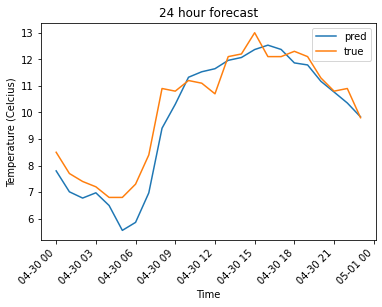

In [16]:
plt.plot(predictions_backtest24.iloc[-24:],label='pred')
plt.plot(data.actual_temp.iloc[-24:],label='true')
plt.xlabel("Time")
plt.ylabel("Temperature (Celcius)")
plt.title("24 hour forecast")
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()
